# 1051HB Analysis

## Objectives
- [x] build 1051HB spreadsheet parser
- **what is available?** --> *send to Nick & Aditi once made it*
    - what providers?
    - what sources?
    - what frequency? how long?
    - customer categories?
- water usage
    - [ ] each location, total over time
    - [ ] each location, per capita over time
- rate structures (later)
    - [ ] tier thresholds (quantity for each, over time)
    - [ ] types
- restrictions
    - [ ] unique types of restrictions found in these reports
        - quantity, total
        - quantity, each year
    - [ ] type implemented over time for each or all locations
    - [ ] quantity of type implemented over time for all locations

subdivision of cities into regions? how define the regions?

In [1]:
# importing libraries, modules, and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

# defining some static, useful variables
month_list = pd.Series(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
month_num = list(month_list.index+1)
months_ordered = [f'{r:02}-' for r in month_num] + month_list
month_dict = {x: y for x in month_list for y in month_num if month_list[y-1] == x}
# dict([(x, y) for x in month_list for y in months_ordered if pd.Index(month_list).get_loc(x) == pd.Index(months_ordered).get_loc(y)])

# Initial processing of the data from provided Excel sheets

In [2]:
# reading 1051HB raw excel sheets into dataframes

data_file = pd.ExcelFile('1051PublicDataReport_all-2024.xlsx')

reports_list = data_file.parse('1051 Reports') # , index_col='1051 Report: DNR 1051 Report Name'
county_info = data_file.parse('County Based Data')
programs_list = data_file.parse('Program Data')
total_water_use = data_file.parse('Water Use')
metered_data_table = data_file.parse('MeteredData') # , index_col=[1, 0, 2]

## Indexing the raw reports

In [3]:
# 1051 reports

reports_idx = ['1051 Report: DNR 1051 Report Name']
reports = reports_list.set_index(reports_idx).sort_index()
reports.sort_values(['Account Name', 'Report Year']).head()

,Account Name,Report Year,Permanent Residential Population,Transient Population,Transient Population Type,Do you allow the use of return flows?,Percentage of supplies that can be reuse,Decreed Plan to use your LIRF?,Comments,In-Basin Surface Water Supplies,...,Reactive approach to leak detection,Active use of acct methods to find leaks,Active use of field testing to find leak,Other - Specify,Leak Detection Comments,Active Service Connection,Average Number of Housing Units,Irrigated Area in Acres,Approximate Acreage of Irrigated Turf,Frequency
1051 Report: DNR 1051 Report Name,,,,,,,,,,,,,,,,,,,,,
R-000130,Arapahoe County Water and Wastewater Authority,2013.0,31000,25000,Other,0,NaN,0,NaN,NaN,...,1,0,0,NaN,Limited budget / field staff has resulted in n...,0,0.0,0.0,0.0,NaN
R-000129,Arapahoe County Water and Wastewater Authority,2014.0,31000,25000,Other,0,NaN,0,NaN,NaN,...,1,0,0,NaN,NaN,0,0.0,0.0,0.0,NaN
R-000166,Arapahoe County Water and Wastewater Authority,2015.0,31000,25000,Annual,0,NaN,0,NaN,NaN,...,1,0,0,NaN,Limited budget / field staff has resulted in n...,0,0.0,0.0,0.0,NaN
R-000076,Arapahoe County Water and Wastewater Authority,2016.0,31000,25000,Annual,1,25.0,0,NaN,NaN,...,1,0,0,NaN,Limited budget / field staff has resulted in n...,0,0.0,0.0,0.0,NaN
R-000420,Arapahoe County Water and Wastewater Authority,2017.0,31000,25000,Annual,1,26.9,0,NaN,NaN,...,1,0,0,NaN,Limited budget / field staff has resulted in n...,0,0.0,0.0,0.0,NaN


In [4]:
# County Based Data

counties_idx = ['DNR 1051 Report Name', 'County Name']
counties = county_info.set_index(counties_idx).sort_index()
counties.sort_values(['Account Name']).head()

Account Name  \
DNR 1051 Report Name County Name                                                   
R-000286             Douglas      Arapahoe County Water and Wastewater Authority   
R-000420             Arapahoe     Arapahoe County Water and Wastewater Authority   
R-000024             Arapahoe     Arapahoe County Water and Wastewater Authority   
                     Douglas      Arapahoe County Water and Wastewater Authority   
                     Elbert       Arapahoe County Water and Wastewater Authority   

                                  Population Served %  Transient Population %  \
DNR 1051 Report Name County Name                                                
R-000286             Douglas                      6.0                      10   
R-000420             Arapahoe                    90.0                       0   
R-000024             Arapahoe                    90.0                      90   
                     Douglas                      6.0                      10   
                     Elbert                       4.0                       0   

                                  Average Number of Housing Units  
DNR 1051 Report Name County Name                                   
R-000286             Douglas                                  0.0  
R-000420             Arapahoe                                 0.0  
R-000024             Arapahoe                              3010.0  
                     Douglas                               3010.0  
                     Elbert                                3010.0

In [5]:
# Program Data

programs_idx = ['DNR 1051 Report Name', 'DNR1051 Program Data Junction Name']
programs = programs_list.set_index(programs_idx).sort_index()
programs.sort_values(['Account Name']).head()

Account Name  \
DNR 1051 Report Name DNR1051 Program Data Junction Name                                                   
R-000130             PG-0009114                          Arapahoe County Water and Wastewater Authority   
R-000024             PG-0000120                          Arapahoe County Water and Wastewater Authority   
R-000420             PG-0005901                          Arapahoe County Water and Wastewater Authority   
                     PG-0004799                          Arapahoe County Water and Wastewater Authority   
                     PG-0004183                          Arapahoe County Water and Wastewater Authority   

                                                         Report Year  \
DNR 1051 Report Name DNR1051 Program Data Junction Name                
R-000130             PG-0009114                               2013.0   
R-000024             PG-0000120                               2021.0   
R-000420             PG-0005901                               2017.0   
                     PG-0004799                               2017.0   
                     PG-0004183                               2017.0   

                                                        Type of Technical Assistance  \
DNR 1051 Report Name DNR1051 Program Data Junction Name                                
R-000130             PG-0009114                                                  NaN   
R-000024             PG-0000120                                                  NaN   
R-000420             PG-0005901                                                  NaN   
                     PG-0004799                                                  NaN   
                     PG-0004183                                                  NaN   

                                                         Done prior to this reporting period?  \
DNR 1051 Report Name DNR1051 Program Data Junction Name                                         
R-000130             PG-0009114                                                             0   
R-000024             PG-0000120                                                             0   
R-000420             PG-0005901                                                             0   
                     PG-0004799                                                             0   
                     PG-0004183                                                             0   

                                                         Starting Year  \
DNR 1051 Report Name DNR1051 Program Data Junction Name                  
R-000130             PG-0009114                                    NaN   
R-000024             PG-0000120                                    NaN   
R-000420             PG-0005901                                    NaN   
                     PG-0004799                                    NaN   
                     PG-0004183                                    NaN   

                                                        Method of Application/Prioritization  \
DNR 1051 Report Name DNR1051 Program Data Junction Name                                        
R-000130             PG-0009114                                                          NaN   
R-000024             PG-0000120                                                          NaN   
R-000420             PG-0005901                                                          NaN   
                     PG-0004799                                                          NaN   
                     PG-0004183                                                          NaN   

                                                        Incentive Type Indoor  \
DNR 1051 Report Name DNR1051 Program Data Junction Name                         
R-000130             PG-0009114                                           NaN   
R-000024             PG-0000120                                           NaN   
R-000420             PG

In [6]:
# Total Water Used

totals_idx = ['DNR 1051 Report Name', 'Water Type: DNR1051 Water Type Name']
totals = total_water_use.set_index(totals_idx).sort_index()
totals.sort_values(['Account Name'])

Account Name  \
DNR 1051 Report Name Water Type: DNR1051 Water Type Name                                                   
R-000286             Non-Potable Raw                      Arapahoe County Water and Wastewater Authority   
R-000024             Potable Treated                      Arapahoe County Water and Wastewater Authority   
R-000464             Non-Potable Raw                      Arapahoe County Water and Wastewater Authority   
R-000348             Non-Potable Raw                      Arapahoe County Water and Wastewater Authority   
R-000130             Non-Potable Reuse                    Arapahoe County Water and Wastewater Authority   
...                                                                                                  ...   
R-000099             Non-Potable Raw                                                    Windsor, Town of   
R-000277             Non-Potable Raw                                                    Windsor, Town of   
                     Non-Potable Reuse                                                  Windsor, Town of   
R-000103             Potable Treated                                                    Windsor, Town of   
R-000274             Potable Treated                                                    Windsor, Town of   

                                                         Reporting Units  \
DNR 1051 Report Name Water Type: DNR1051 Water Type Name                   
R-000286             Non-Potable Raw                           Acre-feet   
R-000024             Potable Treated                           Acre-feet   
R-000464             Non-Potable Raw                             Gallons   
R-000348             Non-Potable Raw                           Acre-feet   
R-000130             Non-Potable Reuse                         Acre-feet   
...                                                                  ...   
R-000099             Non-Potable Raw                             Gallons   
R-000277             Non-Potable Raw                             Gallons   
                     Non-Potable Reuse                           Gallons   
R-000103             Potable Treated                             Gallons   
R-000274             Potable Treated                             Gallons   

                                                          Produced Water Volume  \
DNR 1051 Report Name Water Type: DNR1051 Water Type Name                          
R-000286             Non-Potable Raw                               1.920000e+02   
R-000024             Potable Treated                               3.180010e+03   
R-000464             Non-Potable Raw                               9.996270e+10   
R-000348             Non-Potable Raw                               1.700000e+02   
R-000130             Non-Potable Reuse                             3.200000e+02   
...                                                                         ...   
R-000099             Non-Potable Raw                               0.000000e+00   
R-000277             Non-Potable Raw                               0.000000e+00   
                     Non-Potable Reuse                             0.000000e+00   
R-000103             Potable Treated                               6.620000e+08   
R-000274             Potable Treated                               6.570432e+08   

                                                          Exported Water Volume  \
DNR 1051 Report Name Water Type: DNR1051 Water Type Name                          
R-000286             Non-Potable Raw                                        0.0   
R-000024             Potable Treated                                        0.0   
R-000464             Non-Potable Raw                                        0.0   
R-000348             Non-Potable Raw                                        0.0   
R-000130             Non-Potable Reuse                                      0.0   
...                                  

In [7]:
# Metered Data

metered_idx = ['Record Type', 'DNR 1051 Report Name', 'Customer Category', 'Water Type']
metered_data = metered_data_table.set_index(metered_idx).sort_index()
# metered_data.sort_values(['Account Name']).columns
# metered_data

## Reconfiguring data tables

Removing some overlap in the tables to make a cleaner, more streamlined set of tables to work with and analyze.

In [8]:
# Reports --> compiling other info from other reports that are actually at the report level

# grab drought status comments from Metered Data
drought_comments = metered_data.loc[['Drought Status'], ['Drought Status Comments']].reset_index(level=[i for i in metered_idx if i != 'DNR 1051 Report Name'], drop=True)

# removing duplicates (index & cell content)
drought_comments = drought_comments.reset_index().loc[~drought_comments.reset_index().duplicated(), :].set_index('DNR 1051 Report Name')

# join to reports table -- be sure to rerun the above cells first (to refresh reports) if you are testing this out multiple times
reports = reports.join(drought_comments)
# reports

## split metered table

split restrictions & metered data into separate tables

In [9]:
# Restrictions (each month)

arr = metered_data.reset_index(['Customer Category', 'Water Type']).loc['Drought Status', 'January Restriction Type':'December Reason']
cols = [tuple(str(f'{r}'[r.find(' ')+1:] + '|' + f'{r}'[:r.find(' ')]).split('|')) for r in arr.columns.to_list()]
arr.columns = pd.MultiIndex.from_tuples(cols)

restrictions = pd.DataFrame(arr.stack(future_stack=True))
restrictions.index.set_names(names='Month', level=1, inplace=True)
restrictions.rename(index=month_dict, level=1, inplace=True)
restrictions.head()

Restriction Type  \
DNR 1051 Report Name Month                    
R-000001             1       No Restriction   
                     2       No Restriction   
                     3       No Restriction   
                     4       No Restriction   
                     5            Mandatory   

                                                         Reason  
DNR 1051 Report Name Month                                       
R-000001             1                                      NaN  
                     2                                      NaN  
                     3                                      NaN  
                     4                                      NaN  
                     5      Other - please describe in comments

In [10]:
# Metered Use (each month)

metered = metered_data.loc['Metered Water Use', 'January Metered Use':'December Metered Use']
metered.columns = month_list
metered = pd.DataFrame(metered.stack(), columns=['Metered Use'])
metered.index.set_names(names='Month', level=3, inplace=True)
metered.rename(index=month_dict, level=3, inplace=True)
metered.head()

Metered Use
DNR 1051 Report Name Customer Category       Water Type      Month             
R-000001             Commercial / Industrial Potable Treated 1         163722.0
                                                             2         153683.0
                                                             3         186304.0
                                                             4         183790.0
                                                             5         209990.0

# Data Summary

## What data is available?

What are all the different cities/ reporting units?

In [11]:
cities = reports.reset_index().groupby(by='Account Name').agg({'1051 Report: DNR 1051 Report Name': 'count', 
                                                      'Report Year': ['min', 'max', lambda x: x.max() - x.min() + 1],
                                                      'Permanent Residential Population': 'mean'})
# reports
cities = cities.droplevel(level=[0], axis='columns').rename(columns={'count': 'Qty 1051 Reports',
                                                            'min': 'Min Year Available',
                                                            'max': 'Max Year Available',
                                                            '<lambda_0>': 'Years Range',
                                                            'mean': 'Average Population'})

cities.sort_values(by=['Years Range', 'Qty 1051 Reports'], ascending=[False, False], inplace=True)

cities

,Qty 1051 Reports,Min Year Available,Max Year Available,Years Range,Average Population
Account Name,,,,,
"Longmont, City of",13,2013.0,2024.0,12.0,91920.769231
Parker Water and Sanitation District,13,2013.0,2024.0,12.0,48443.076923
Arapahoe County Water and Wastewater Authority,12,2013.0,2024.0,12.0,24833.333333
"Aspen, City of",12,2013.0,2024.0,12.0,10882.833333
"Aurora, City of",12,2013.0,2024.0,12.0,377715.083333
...,...,...,...,...,...
"Gypsum,Town of",1,2023.0,2023.0,1.0,8954.000000
"Lamar, Town of",1,2014.0,2014.0,1.0,7860.000000
Shannon Water and Sanitation District,1,2021.0,2021.0,1.0,600.000000


In [14]:
cities.describe()

,Qty 1051 Reports,Min Year Available,Max Year Available,Years Range,Average Population
count,76.000000,76.000000,76.000000,76.000000,7.600000e+01
mean,7.460526,2015.026316,2022.263158,8.236842,6.541547e+04
std,4.158336,3.528829,3.017144,4.270420,1.593145e+05
min,1.000000,2013.000000,2013.000000,1.000000,0.000000e+00
25%,4.000000,2013.000000,2020.750000,4.000000,1.186275e+04
50%,8.000000,2013.000000,2024.000000,11.000000,2.109288e+04
75%,12.000000,2014.500000,2024.000000,12.000000,6.604454e+04
max,13.000000,2024.000000,2024.000000,12.000000,1.267333e+06


might be easier to view by county? (even though some have multiple counties...) *still in progress*

In [56]:
counties_list = counties.reset_index(level=0, drop=True).groupby(by='County Name', level=0)[['Account Name']].nunique().rename(columns={'Account Name': 'Accounts Included'})
# counties_list
# counties.join(reports, on=['DNR 1051 Report Name'])

### **Which cities have reported the most consistently?**

I am looking at those that are *both* in the upper 50th percentile for:
- number of submitted reports
- range of years reported

These are a good indicator of providers with consistent enough data to be included in the 1051HB analysis.
This can also be a good place to start in terms of who we may want to reach out to first to see about household use data.

In [15]:
cities_50pct = cities.quantile(q=0.5)

cities_top_reporters = cities.loc[(cities['Qty 1051 Reports']>=cities_50pct.loc['Qty 1051 Reports']) & (cities['Years Range']>=cities_50pct.loc['Years Range'])]

# cities_top_reporters.loc['Totals'] = # TRYING TO ADD TOTALS/ SUMMARY ROW

cities_top_reporters#[['Qty 1051 Reports']].sum()

# reports.loc[reports['Account Name'] == 'Longmont, City of'].sort_values(by='Report Year')

,Qty 1051 Reports,Min Year Available,Max Year Available,Years Range,Average Population
Account Name,,,,,
"Longmont, City of",13,2013.0,2024.0,12.0,9.192077e+04
Parker Water and Sanitation District,13,2013.0,2024.0,12.0,4.844308e+04
Arapahoe County Water and Wastewater Authority,12,2013.0,2024.0,12.0,2.483333e+04
"Aspen, City of",12,2013.0,2024.0,12.0,1.088283e+04
"Aurora, City of",12,2013.0,2024.0,12.0,3.777151e+05
Board of Water Works of Pueblo,12,2013.0,2024.0,12.0,1.121655e+05
"Boulder, City of",12,2013.0,2024.0,12.0,1.187483e+05
"Breckenridge, Town of",12,2013.0,2024.0,12.0,4.200000e+03
"Brighton, City of",12,2013.0,2024.0,12.0,3.590292e+04


### **What frequencies are being reported?**

In [16]:
pd.DataFrame(data=reports.groupby(by='Frequency', dropna=False).count()['Account Name']).rename(columns={'Account Name': 'count'})

,count
Frequency,
Every Two Months,11
Monthly,145
Other,2
Quarterly,4
NaN,405


there are a lot of NULL values for frequency...

Let's see when the first notation of frequency occurred -- might not have been a required reporting metric until a given year...

As seen below, it wasn't until 2021 that utilities began reliably reporting frequency.

In [17]:

# pd.DataFrame(data=reports.loc[reports['Frequency'].notna()].sort_values(by='Report Year').groupby(by='Report Year').count()['Account Name']).rename(columns={'Account Name': 'count'})

totals_with_freq = reports.groupby(by='Report Year').count()[['Account Name', 'Frequency']]
totals_with_freq['Reported Freq %'] = totals_with_freq['Frequency'] / totals_with_freq['Account Name']
totals_with_freq['Reported Freq %'] = totals_with_freq['Reported Freq %'].map('{:.2%}'.format)

totals_with_freq

,Account Name,Frequency,Reported Freq %
Report Year,,,
2013.0,51,0,0.00%
2014.0,55,0,0.00%
2015.0,49,0,0.00%
2016.0,47,0,0.00%
2017.0,50,0,0.00%
2018.0,48,0,0.00%
2019.0,44,1,2.27%
2020.0,38,2,5.26%
2021.0,40,32,80.00%


***What's the most recent frequency reported for each city?***

In [18]:
rpts = reports.loc[(reports['Frequency'].notna()), ['Account Name', 'Report Year', 'Frequency']].reset_index(drop=True)

rpts_max_year = rpts.groupby(by='Account Name')['Report Year'].idxmax()

rpts_max_year
rpts_max_year.reset_index(drop=True)
rpts.loc[rpts_max_year.reset_index(drop=True)]


,Account Name,Report Year,Frequency
131,Arapahoe County Water and Wastewater Authority,2024.0,Monthly
128,"Arvada, City of",2024.0,Every Two Months
125,"Aspen, City of",2024.0,Monthly
137,"Aurora, City of",2024.0,Monthly
139,Board of Water Works of Pueblo,2024.0,Monthly
151,"Boulder, City of",2024.0,Monthly
132,"Breckenridge, Town of",2024.0,Monthly
80,"Brighton, City of",2024.0,Monthly
141,"Broomfield, City and County of",2024.0,Monthly
70,Canon City Water Department,2022.0,Monthly


***What cities did not report any frequencies?***

In [19]:
no_freq = reports.loc[:, ['Account Name', 'Frequency']].reset_index(drop=True).groupby(by='Account Name')[['Account Name', 'Frequency']].count()
no_freq.loc[no_freq['Frequency']==0].rename(columns={'Account Name': 'Total Reports'})


,Total Reports,Frequency
Account Name,,
Central Weld County Water District,10,0
Cherokee Metropolitan District,7,0
City of Canon City,5,0
Consolidated Mutual Water Co,2,0
East Larimer County Water District,3,0
"Evans, City of",7,0
"Firestone, Town of",5,0
"Fort Collins, City of",8,0
"Fort Lupton, City of",1,0


***What about changes in frequency?***

If a given city has had different frequencies reported, it might be a good indication that they had some strucutural change that might be of interest to us -- could be a rate change, maybe just a meter monitoring change, but either way should probably follow up on it.

In [20]:
freq_changes = reports.loc[reports['Frequency'].notna(), ['Report Year', 'Account Name', 'Frequency']]
freq_changes = freq_changes.drop_duplicates(subset=['Account Name', 'Frequency'], keep='last').sort_values(by=['Account Name', 'Report Year'])
freq_changes.loc[freq_changes.duplicated(subset=['Account Name'], keep=False)]

,Report Year,Account Name,Frequency
1051 Report: DNR 1051 Report Name,,,
R-000521,2022.0,"Breckenridge, Town of",Every Two Months
R-000510,2023.0,"Breckenridge, Town of",Other
R-000540,2024.0,"Breckenridge, Town of",Monthly
R-000002,2021.0,"Englewood, City of",Other
R-000504,2023.0,"Englewood, City of",Monthly


In [45]:
def mtr_breakdown(column_name, type):
    '''
    Provides a breakdown of the "metered" table to get total counts or count per year
    column_name: string
    type: 'year','total' 
    '''
    total_table = metered.reset_index().groupby(by=column_name)[['DNR 1051 Report Name']].nunique().rename(columns={'DNR 1051 Report Name': 'Qty of Reports with ' + column_name}) # baseline table, category with count
    
    mtr_reports = metered.reset_index().set_index('DNR 1051 Report Name').join(reports) # to get the years, so we can see how the categories change over time
    tbl_name = 'Quantity of Reports Submitted containing a given ' + column_name + ' for each year'
    yearly_table = mtr_reports.reset_index().groupby(by=[column_name, 'Report Year'])[['index']].nunique().unstack(level=0).rename(columns={'index': tbl_name}) # probably want to pivot this...

    if type == 'total':
        return total_table
    elif type == 'year':
        return yearly_table

### Customer Categories

What are the different reported Customer Categories?
How many reports include each?

In [46]:
mtr_breakdown(column_name='Customer Category', type='total')

,Qty of Reports with Customer Category
Customer Category,
Bulk/Wholesale,149
Commercial / Industrial,540
Irrigation,456
Mixed Use,19
Other,218
"Residential, Multi Family",361
"Residential, Single Family",372
SF and MF Residential Combined,235
Utility/Municipal,350


In [47]:
mtr_breakdown(column_name='Customer Category', type='year')

Quantity of Reports Submitted containing a given Customer Category for each year  \
Customer Category                                                                   Bulk/Wholesale   
Report Year                                                                                          
2013.0                                                           9.0                                 
2014.0                                                           9.0                                 
2015.0                                                           9.0                                 
2016.0                                                           9.0                                 
2017.0                                                          12.0                                 
2018.0                                                          12.0                                 
2019.0                                                          12.0                                 
2020.0                                                           9.0                                 
2021.0                                                          15.0                                 
2022.0                                                          14.0                                 
2023.0                                                          18.0                                 
2024.0                                                          21.0                                 

                                                                      \
Customer Category Commercial / Industrial Irrigation Mixed Use Other   
Report Year                                                            
2013.0                               50.0       41.0       NaN  26.0   
2014.0                               55.0       46.0       NaN  24.0   
2015.0                               49.0       41.0       NaN  20.0   
2016.0                               45.0       38.0       NaN  20.0   
2017.0                               50.0       43.0       1.0  20.0   
2018.0                               47.0       40.0       1.0  20.0   
2019.0                               43.0       36.0       1.0  18.0   
2020.0                               36.0       28.0       1.0  16.0   
2021.0                               37.0       32.0       NaN   2.0   
2022.0                               42.0       36.0       1.0  11.0   
2023.0                               41.0       35.0       6.0  18.0   
2024.0                               44.0       40.0       8.0  23.0   

                                                                        \
Customer Category Residential, Multi Family Residential, Single Family   
Report Year                                                              
2013.0                                 33.0                       33.0   
2014.0                                 34.0                       33.0   
2015.0                                 34.0                       31.0   
2016.0                                 33.0                       31.0   
2017.0                                 33.0                       34.0   
2018.0                                 28.0                       30.0   
2019.0                                 27.0                       28.0   
2020.0                                 23.0                       23.0   
2021.0                                 25.0                       26.0   
2022.0                                 29.0                       30.0   
2023.0                                 29.0                       33.0   
2024.0                                 33.0                       39.0   

                                                                    
Customer Category SF and MF Residential Combined Utility/Municipal  
Report Year                                                         
2013.0                                      30.0              34.0  
2014.0             

### Water Sources

In [48]:
mtr_breakdown(column_name='Water Type', type='total')

,Qty of Reports with Water Type
Water Type,
,16
Non-Potable Raw,269
Non-Potable Reuse,102
Potable Treated,551


In [49]:
mtr_breakdown(column_name='Water Type', type='year')

Quantity of Reports Submitted containing a given Water Type for each year  \
Water Type                                                                              
Report Year                                                                             
2013.0                                                     NaN                          
2014.0                                                     NaN                          
2015.0                                                     NaN                          
2016.0                                                     NaN                          
2017.0                                                     NaN                          
2018.0                                                     NaN                          
2019.0                                                     NaN                          
2020.0                                                     NaN                          
2021.0                                                     5.0                          
2022.0                                                     1.0                          
2023.0                                                     4.0                          
2024.0                                                     6.0                          

                                                               
Water Type  Non-Potable Raw Non-Potable Reuse Potable Treated  
Report Year                                                    
2013.0                 23.0              10.0            51.0  
2014.0                 26.0              10.0            55.0  
2015.0                 24.0              11.0            49.0  
2016.0                 20.0               9.0            45.0  
2017.0                 23.0               7.0            50.0  
2018.0                 25.0               9.0            47.0  
2019.0                 23.0               9.0            43.0  
2020.0                 24.0               8.0            36.0  
2021.0                 20.0               5.0            37.0  
2022.0                 20.0               8.0            42.0  
2023.0                 20.0               7.0            45.0  
2024.0                 21.0               9.0            50.0

---
---
---

## merge comments

some analysis might want to see the drought comments with the restriction information, so just in case this joins the report-level comments with the restrictions table for ease of use, *though this might not be used in favor of an in-place "index-match" alike if it's applicable*

In [17]:

# adding drought comments back into restrictions table for ease of reference

rpt_comments = reports.reset_index(names=['rptNum']).set_index('rptNum')['Drought Status Comments']
restr_filter = restrictions.reset_index().set_index('DNR 1051 Report Name') # .loc[(restrictions['Restriction Type'].notna()) & (restrictions['Restriction Type'] != 'No Restriction')]
restr_cmts = restr_filter.join(rpt_comments)
restr_cmts.index.name = 'rptMonth'

restr_cmts = restr_cmts.set_index('Month', append=True).sort_index()
# restr_cmts

# getting list of the different types of restrictions (for later use)
# restrictions['Restriction Type'].unique()

## organize residential data

- **Customer Category:** remove all but Single and Multi Family Residentials
- add report-level city name and report year
- merge month & report year into a date field for timescale analysis
    - set `day = 1`
    - ***needed to remove duplicates at the end of this step***
        - R-000007 | Residential, Single Family | Colorado Springs Utilities => *does not have a year set*; need to request this

In [18]:
## checking list of customer categories
# metered.groupby(level=[1]).sum()

# filter out non-residential data (note: used groupby to exclude the Water Type column; omit groupby().sum() to include all indices)
res_metered = metered.groupby(level=[0, 1, 3]).sum().loc[(slice(None), ['Residential, Single Family', 'Residential, Multi Family', 'SF and MF Residential Combined']), :]

# merge report-level information (Account Name, Report Year) into this table
res_metered = reports[['Account Name', 'Report Year']].rename_axis(index={'1051 Report: DNR 1051 Report Name': 'DNR 1051 Report Name'}).join(res_metered, how='right')
res_metered = res_metered.set_index(keys=['Account Name', 'Report Year'], append=True)

## check unstackability of current table
# res_metered.unstack(level=['Customer Category'])

In [19]:
# merge/ replace Month & Report Year columns into a new date field
res_metered = res_metered.reset_index(level=['Report Year', 'Month']).rename(columns={'Report Year': 'year', 'Month': 'month'})
res_metered['day'] = 1
res_metered['date'] = pd.to_datetime(arg=res_metered[['year', 'month', 'day']])
res_metered.drop(columns=['year', 'month', 'day'], inplace=True)
res_metered.set_index(keys='date', append=True, inplace=True)

In [20]:
# remove duplicates in the index
res_metered = res_metered.loc[~res_metered.index.duplicated(keep=False), :] 

# widen table by customer category type
res_metered = res_metered.unstack(level=['Customer Category']).reorder_levels(['Account Name', 'DNR 1051 Report Name', 'date'])

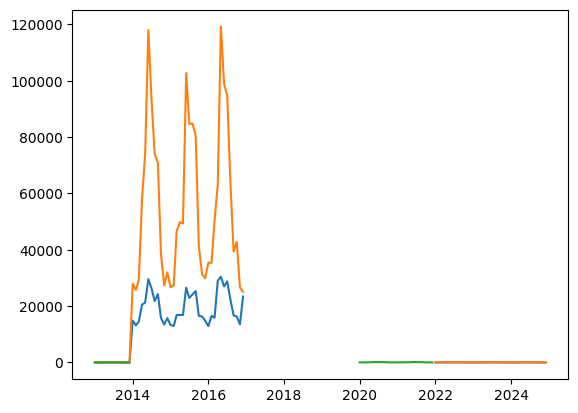

In [21]:
plot_res_metered = res_metered.loc['Grand Junction, City of', :].reset_index(level='DNR 1051 Report Name', drop=True).sort_index(level='date')

ax_count = reports['Account Name'].unique().__len__()
# fig_res, ax_res = plt.subplots(ax_count, 1)

fig, ax = plt.subplots()

date_list = res_metered.index.to_frame().reset_index(drop=True)['date']
(min_date, max_date) = (date_list.min(), date_list.max())
xticks = pd.date_range(min_date, max_date, freq='MS')

ax.plot(plot_res_metered)

# plot_res_metered.plot()

# plot_res_metered

#.plot()

# NOTE TO SELF -- will probably want to normalize against population for per-capita usage

# other plots ideas
## map of colorado, color/ circle size for per capita usage



Text(0, 0.5, 'entry b')

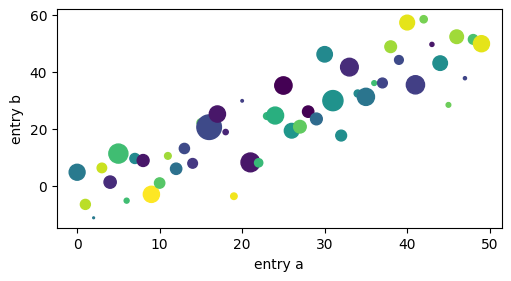

In [22]:
### playing around with matplotlib (following the tutorial)

# fig1, ax = plt.subplots(2, 1)

b = np.matrix([[1, 2], [3, 4]])
b_asarray = np.asarray(b)

np.random.seed(19680801)  # seed the random number generator.
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b')
